# Importing the Necessary Libraries:

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV

# Preparing the Dataframe:

In [28]:
df = pd.read_csv('../data/cleaned/combined_all_years_cleaned_final.csv')
df.head()

,County,State,mean_life_expectancy,disability_rate,total_population,age_60_and_over,poverty_rate,housing_cost_burden,bachelors_and_above_percentage,median_gross_rent,...,median_household_income,per_capita_income,high_school_only_percentage,median_home_value,age_18_and_under_percentage,Year,white_percentage,black_percentage,native_american_percentage,asian_percentage
0,Abbeville County,South Carolina,76.554614,19.7,25387.0,14.7,20.8,221.0,11.7,593.0,...,35067.0,17876.0,34.8,90300.0,10.2,2012,69.953126,28.140387,0.070902,0.059085
1,Acadia Parish,Louisiana,74.133702,17.9,61611.0,10.9,19.1,339.0,9.3,541.0,...,38686.0,19369.0,42.2,88900.0,9.9,2012,78.789502,18.152603,0.220740,0.274302
2,Accomack County,Virginia,75.798941,11.8,33454.0,17.5,20.2,199.0,17.3,741.0,...,40780.0,22909.0,39.3,153800.0,8.0,2012,67.513601,28.755904,0.334788,0.122556
3,Ada County,Idaho,80.699209,9.6,394961.0,9.3,12.2,4338.0,37.8,821.0,...,55499.0,27522.0,20.8,193300.0,9.2,2012,91.925532,1.027190,0.536002,2.593674
4,Adair County,Iowa,78.760544,13.7,7628.0,18.6,9.9,43.0,11.5,511.0,...,47872.0,25147.0,45.5,96700.0,7.1,2012,97.758259,0.144206,0.157315,0.603041


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24858 entries, 0 to 24857
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   County                          24858 non-null  object 
 1   State                           24858 non-null  object 
 2   mean_life_expectancy            24858 non-null  float64
 3   disability_rate                 24858 non-null  float64
 4   total_population                24858 non-null  float64
 5   age_60_and_over                 24858 non-null  float64
 6   poverty_rate                    24858 non-null  float64
 7   housing_cost_burden             24858 non-null  float64
 8   bachelors_and_above_percentage  24858 non-null  float64
 9   median_gross_rent               24858 non-null  float64
 10  age_15_to_44_percentage         24858 non-null  float64
 11  gini_index                      24858 non-null  float64
 12  less_than_9th_grade_percentage  

In [32]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean_life_expectancy,24858.0,77.365326,2.560676,66.047153,75.614112,77.491757,79.068485,9.225386e+01
disability_rate,24858.0,15.703242,4.407639,3.700000,12.600000,15.300000,18.400000,3.690000e+01
total_population,24858.0,101895.308231,324975.256363,607.000000,11392.250000,26136.500000,68324.250000,1.010572e+07
age_60_and_over,24858.0,18.872476,6.893613,2.000000,13.600000,17.400000,23.700000,6.540000e+01
poverty_rate,24858.0,16.226442,6.488762,2.300000,11.600000,15.400000,19.700000,5.550000e+01
housing_cost_burden,24858.0,1136.591319,4659.092710,0.000000,69.000000,196.000000,610.000000,1.631040e+05
bachelors_and_above_percentage,24858.0,20.421945,9.404331,2.800000,13.900000,18.200000,24.500000,8.020000e+01
median_gross_rent,24858.0,716.431330,203.878841,99.000000,587.000000,667.000000,791.000000,2.316000e+03
age_15_to_44_percentage,24858.0,63.070822,21.253285,16.100000,37.700000,76.800000,79.900000,9.850000e+01
gini_index,24858.0,0.442139,0.035156,0.302300,0.418100,0.439800,0.463800,7.070000e-01


In [34]:
df.columns

Index(['County', 'State', 'mean_life_expectancy', 'disability_rate',
       'total_population', 'age_60_and_over', 'poverty_rate',
       'housing_cost_burden', 'bachelors_and_above_percentage',
       'median_gross_rent', 'age_15_to_44_percentage', 'gini_index',
       'less_than_9th_grade_percentage', 'health_insurance_rate',
       'unemployment_rate', 'median_household_income', 'per_capita_income',
       'high_school_only_percentage', 'median_home_value',
       'age_18_and_under_percentage', 'Year', 'white_percentage',
       'black_percentage', 'native_american_percentage', 'asian_percentage'],
      dtype='object')

# Splitting Data Into Features (X) and Target (y):

In [37]:
X = df.drop(columns=['County', 'State', 'Year', 'mean_life_expectancy']) #Features 
y = df['mean_life_expectancy'] #Target

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (19886, 21)
Testing data shape: (4972, 21)


# Initializing and Training the Model:

In [44]:
# Initialize the XGBoost Regressor
xg_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

In [46]:
# Train the model
xg_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [48]:
train_predictions = xg_model.predict(X_train)
test_predictions = xg_model.predict(X_test)

# Evaluate the Model:

In [51]:
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print('Train RMSE:', f'{train_rmse:.2f}')
print('Test RMSE:', f'{test_rmse:.2f}')

Train RMSE: 0.54
Test RMSE: 0.87


In [53]:
# Correlation values
train_r_sq = pearsonr(y_train, train_predictions)[0]
test_r_sq = pearsonr(y_test, test_predictions)[0]
print('Train correlation (R^2):', round(train_r_sq, 2))
print('Test correlation (R^2):', round(test_r_sq, 2))

Train correlation (R^2): 0.98
Test correlation (R^2): 0.94


# Visualize Model Performance:

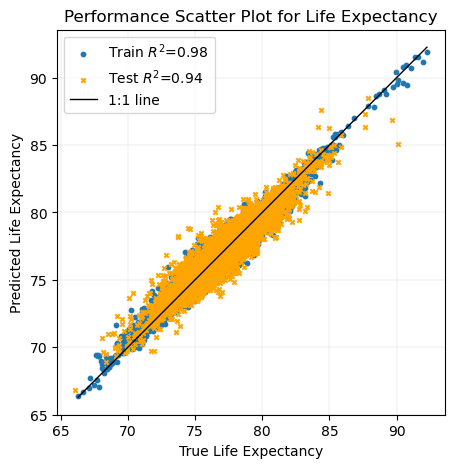

In [58]:
# Scatter plot for model performance
plt.figure(figsize=(5, 5))
plt.scatter(y_train, train_predictions, s=10, c='C0', label=f'Train $R^2$={round(train_r_sq, 2)}')
plt.scatter(y_test, test_predictions, marker='x', s=10, c='orange', label=f'Test $R^2$={round(test_r_sq, 2)}')
p1 = max(max(train_predictions), max(y_train))
p2 = min(min(train_predictions), min(y_train))
plt.plot([p1, p2], [p1, p2], 'black', label='1:1 line', linewidth=1)
plt.xlabel('True Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title("Performance Scatter Plot for Life Expectancy")
plt.legend()
plt.grid(axis='both', linewidth=0.15)
plt.show()

<Figure size 500x500 with 0 Axes>

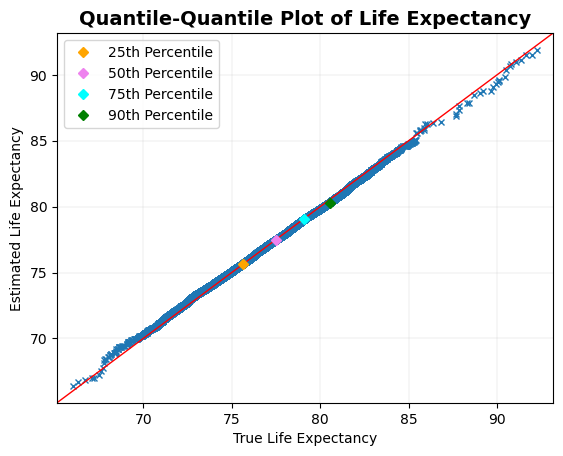

In [60]:
# Quantile-Quantile Plot
all_predictions = np.concatenate((train_predictions, test_predictions))
all_targets = np.concatenate((y_train, y_test))

predictions_sorted = np.sort(all_predictions)
targets_sorted = np.sort(all_targets)

plt.figure(figsize=(5, 5))
pp_x = sm.ProbPlot(predictions_sorted, fit=False)
pp_y = sm.ProbPlot(targets_sorted, fit=False)
qq = pp_x.qqplot(xlabel='True Life Expectancy', ylabel='Estimated Life Expectancy', marker='x', markersize=4, other=pp_y)

# Draw the 45-degree line
sm.qqline(qq.axes[0], line='45', fmt='r', linewidth=1)

# Highlight percentiles for interpretation
targets_25 = np.percentile(targets_sorted, 25)
targets_50 = np.percentile(targets_sorted, 50)
targets_75 = np.percentile(targets_sorted, 75)
targets_90 = np.percentile(targets_sorted, 90)

predictions_25 = np.percentile(predictions_sorted, 25)
predictions_50 = np.percentile(predictions_sorted, 50)
predictions_75 = np.percentile(predictions_sorted, 75)
predictions_90 = np.percentile(predictions_sorted, 90)

# Plotting the percentile markers
plt.plot(targets_25, predictions_25, marker="D", markersize=5, color="orange", linestyle='None', label="25th Percentile")
plt.plot(targets_50, predictions_50, marker="D", markersize=5, color="violet", linestyle='None', label="50th Percentile")
plt.plot(targets_75, predictions_75, marker="D", markersize=5, color="cyan", linestyle='None', label="75th Percentile")
plt.plot(targets_90, predictions_90, marker="D", markersize=5, color="green", linestyle='None', label="90th Percentile")

plt.title('Quantile-Quantile Plot of Life Expectancy', fontsize=14, fontweight="bold")
plt.grid(axis='both', linewidth=0.15)
plt.legend()
plt.show()

# Evaluating Feature Importance:

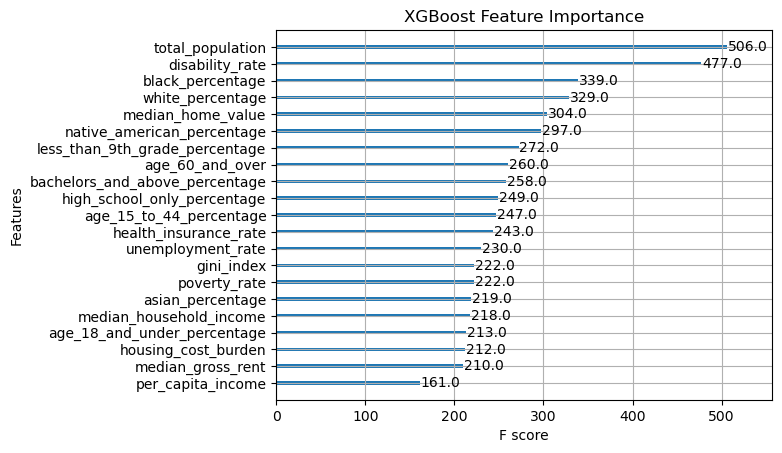

In [63]:
# Plot feature importance
xgb.plot_importance(xg_model, importance_type='weight')
plt.title("XGBoost Feature Importance")
plt.show()

In [67]:
# Now let's try using permutation importance to get a more in-depth analysis
perm_importance = permutation_importance(xg_model, X_test, y_test, n_repeats=10, random_state=42)

In [69]:
perm_importance_df = pd.DataFrame({'Feature': X_test.columns,'Importance': perm_importance.importances_mean
                                  }).sort_values(by='Importance', ascending=False)

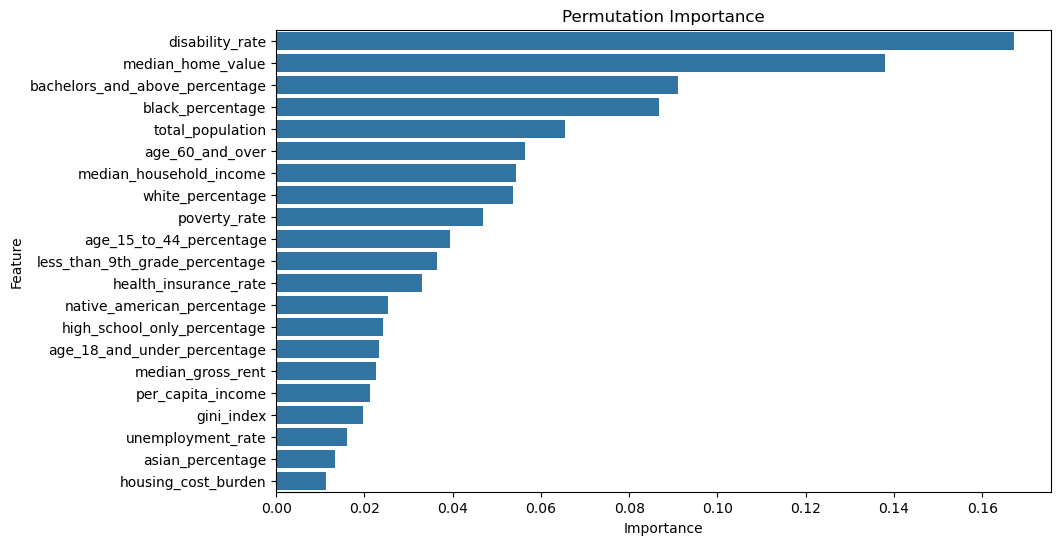

In [71]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=perm_importance_df)
plt.title('Permutation Importance')
plt.savefig('../outputs/permutation_importance_xg.png', bbox_inches = 'tight')
plt.show()

# Using Hyperparameter Optimization:

In [161]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

In [76]:
# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    n_jobs=-1
)

In [78]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=2)

In [82]:
# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}


In [84]:
# Use the best estimator for predictions
best_model = grid_search.best_estimator_

train_predictions = best_model.predict(X_train)
test_predictions = best_model.predict(X_test)

In [86]:
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
print('Train RMSE:', f'{train_rmse:.2f}')
print('Test RMSE:', f'{test_rmse:.2f}')

Train RMSE: 0.26
Test RMSE: 0.75


In [88]:
# Correlation values
train_r_sq = pearsonr(y_train, train_predictions)[0]
test_r_sq = pearsonr(y_test, test_predictions)[0]
print('Train correlation (R^2):', round(train_r_sq, 2))
print('Test correlation (R^2):', round(test_r_sq, 2))

Train correlation (R^2): 0.99
Test correlation (R^2): 0.96


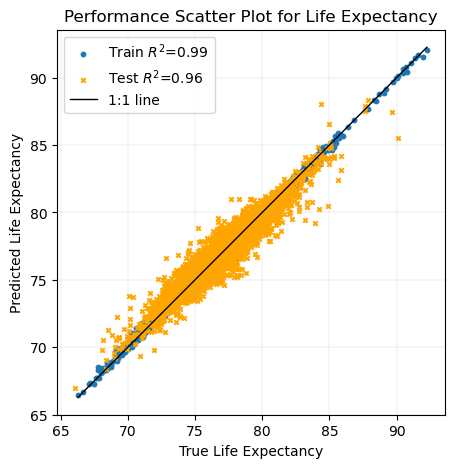

In [90]:
# Scatter plot for model performance
plt.figure(figsize=(5, 5))
plt.scatter(y_train, train_predictions, s=10, c='C0', label=f'Train $R^2$={round(train_r_sq, 2)}')
plt.scatter(y_test, test_predictions, marker='x', s=10, c='orange', label=f'Test $R^2$={round(test_r_sq, 2)}')
p1 = max(max(train_predictions), max(y_train))
p2 = min(min(train_predictions), min(y_train))
plt.plot([p1, p2], [p1, p2], 'black', label='1:1 line', linewidth=1)
plt.xlabel('True Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title("Performance Scatter Plot for Life Expectancy")
plt.legend()
plt.grid(axis='both', linewidth=0.15)
plt.show()

<Figure size 500x500 with 0 Axes>

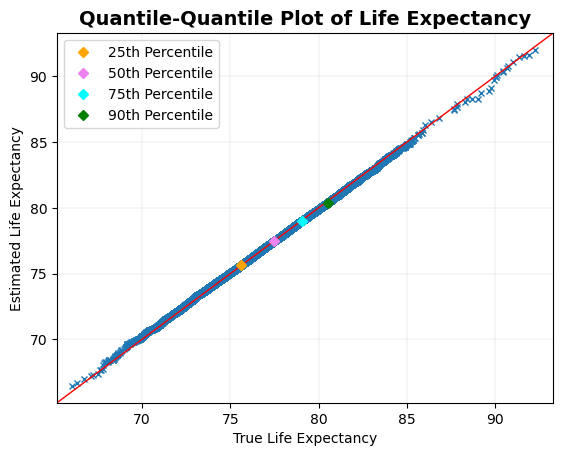

In [92]:
# Quantile-Quantile Plot
all_predictions = np.concatenate((train_predictions, test_predictions))
all_targets = np.concatenate((y_train, y_test))

predictions_sorted = np.sort(all_predictions)
targets_sorted = np.sort(all_targets)

plt.figure(figsize=(5, 5))
pp_x = sm.ProbPlot(predictions_sorted, fit=False)
pp_y = sm.ProbPlot(targets_sorted, fit=False)
qq = pp_x.qqplot(xlabel='True Life Expectancy', ylabel='Estimated Life Expectancy', marker='x', markersize=4, other=pp_y)

# Draw the 45-degree line
sm.qqline(qq.axes[0], line='45', fmt='r', linewidth=1)

# Highlight percentiles for interpretation
targets_25 = np.percentile(targets_sorted, 25)
targets_50 = np.percentile(targets_sorted, 50)
targets_75 = np.percentile(targets_sorted, 75)
targets_90 = np.percentile(targets_sorted, 90)

predictions_25 = np.percentile(predictions_sorted, 25)
predictions_50 = np.percentile(predictions_sorted, 50)
predictions_75 = np.percentile(predictions_sorted, 75)
predictions_90 = np.percentile(predictions_sorted, 90)

# Plotting the percentile markers
plt.plot(targets_25, predictions_25, marker="D", markersize=5, color="orange", linestyle='None', label="25th Percentile")
plt.plot(targets_50, predictions_50, marker="D", markersize=5, color="violet", linestyle='None', label="50th Percentile")
plt.plot(targets_75, predictions_75, marker="D", markersize=5, color="cyan", linestyle='None', label="75th Percentile")
plt.plot(targets_90, predictions_90, marker="D", markersize=5, color="green", linestyle='None', label="90th Percentile")

plt.title('Quantile-Quantile Plot of Life Expectancy', fontsize=14, fontweight="bold")
plt.grid(axis='both', linewidth=0.15)
plt.legend()
plt.show()

In [94]:
# Calculate permutation importance
perm_importance = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)

In [96]:
# Convert to DataFrame for visualization
perm_importance_df = pd.DataFrame({'Feature': X_test.columns,'Importance': perm_importance.importances_mean
                                  }).sort_values(by='Importance', ascending=False)

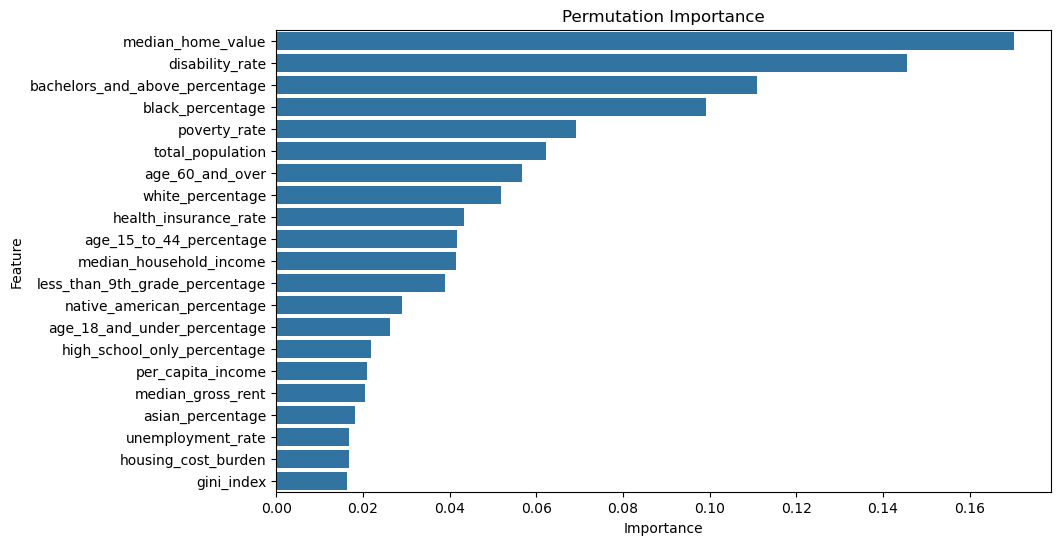

In [98]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=perm_importance_df)
plt.title('Permutation Importance')
plt.savefig('../outputs/permutation_importance.png', bbox_inches = 'tight')
plt.show()

# Evaluating Feature Importance Using SHAP (SHapley Additive exPlanations) Values:

In [101]:
import shap 

In [103]:
# Initialize SHAP explainer
explainer = shap.Explainer(best_model, X_train)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

 98%|===================| 4889/4972 [00:45<00:00]        

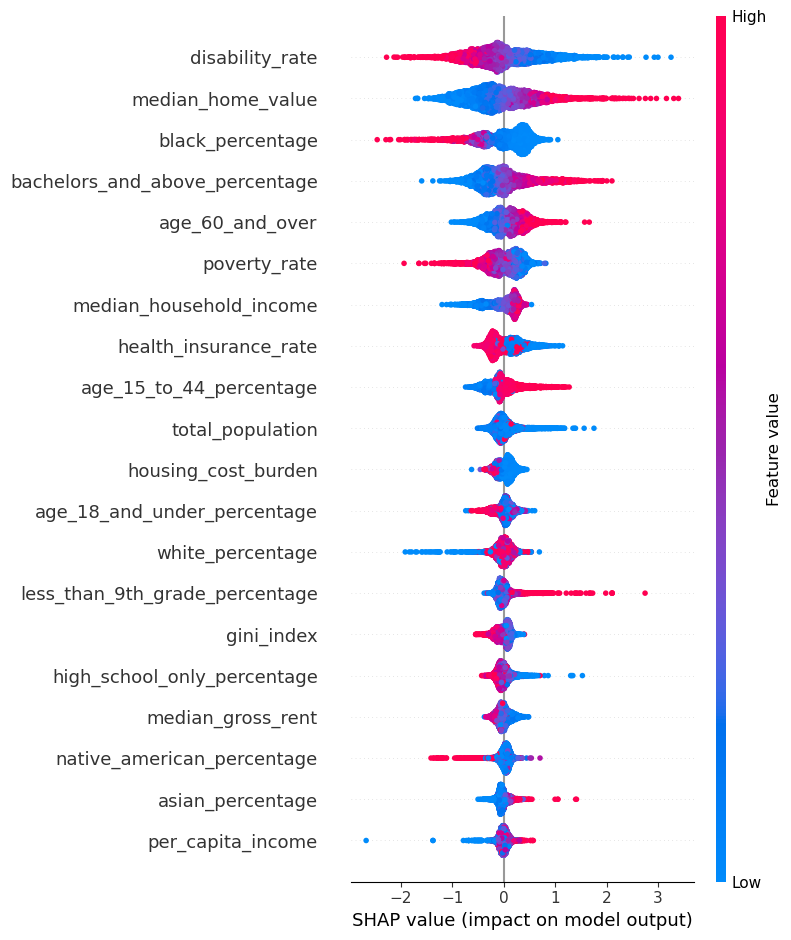

In [133]:
#Global Feature Importance (Summary Plot)
shap.summary_plot(shap_values, X_test)

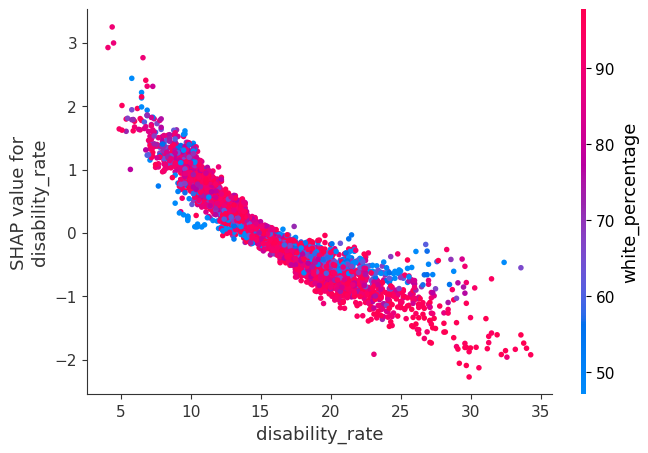

In [135]:
shap.dependence_plot("disability_rate", shap_values.values, X_test)

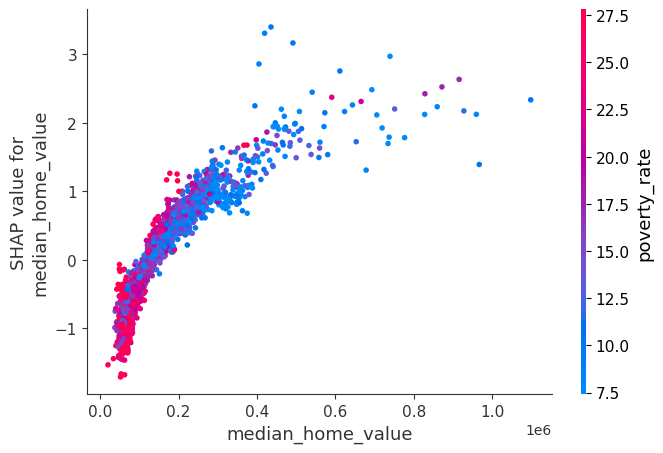

In [137]:
shap.dependence_plot("median_home_value", shap_values.values, X_test)

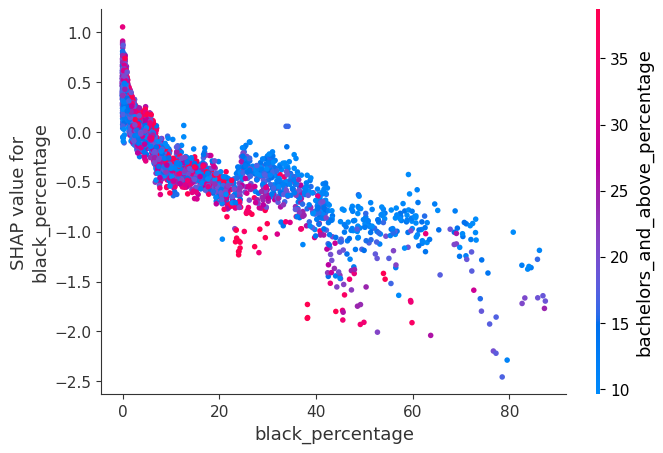

In [139]:
shap.dependence_plot("black_percentage", shap_values.values, X_test)

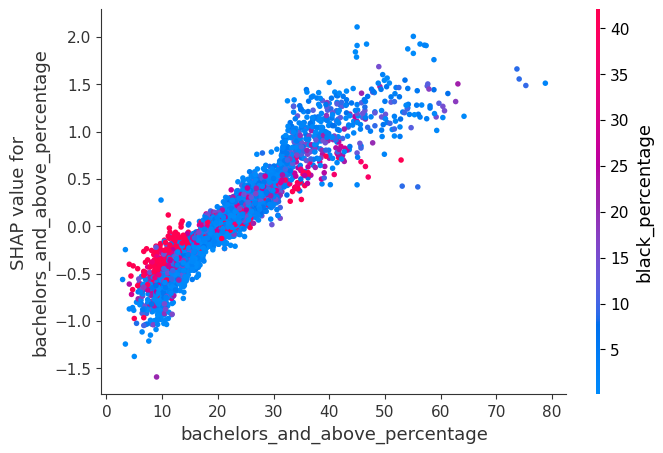

In [141]:
shap.dependence_plot("bachelors_and_above_percentage", shap_values.values, X_test)